In [1]:
%pip install coinmetrics-api-client -q
%pip install mplfinance -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.2/52.2 kB 823.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.6 MB/s eta 0:00:00


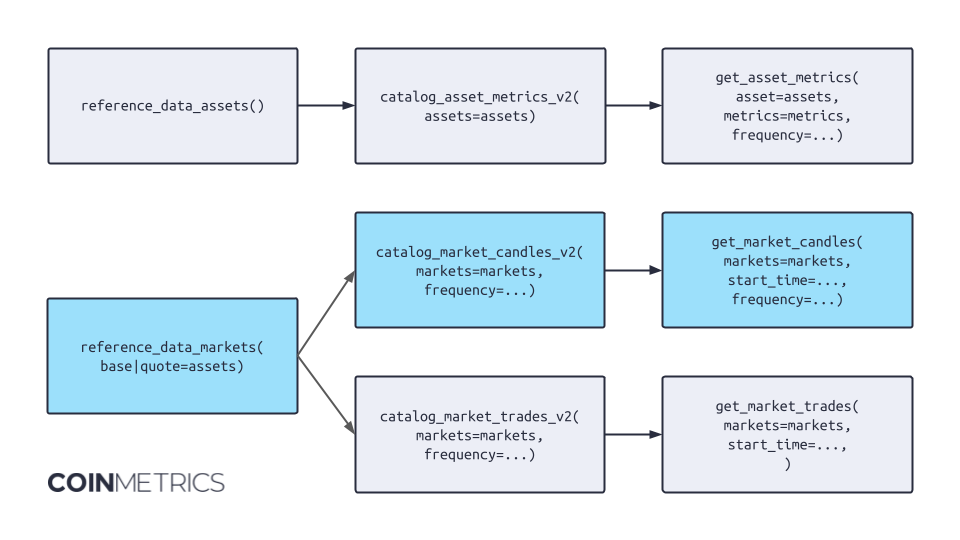

In [2]:
from google.colab import userdata
import pandas as pd
from coinmetrics.api_client import CoinMetricsClient

api_key = userdata.get('api_key') # <------- For this to work, save your API key in a Colab secret.
client = CoinMetricsClient(api_key)


In [3]:
reference_data = client.reference_data_markets(exchange='dydx').to_dataframe()
reference_data

,market,exchange,type,base,quote,pair,symbol,size_asset,margin_asset,contract_size,tick_size,status,order_amount_increment,order_amount_min,order_price_increment,margin_trading_enabled,base_native,quote_native
0,dydx-1INCH-USD-future,dydx,future,1inch,usd,1inch-usd,1INCH-USD,1inch,usdc,1.0,0.0001,online,10.0,10.0,0.0001,False,1INCH,USD
1,dydx-AAVE-USD-future,dydx,future,aave,usd,aave-usd,AAVE-USD,aave,usdc,1.0,0.01,online,0.1,0.1,0.01,False,AAVE,USD
2,dydx-ADA-USD-future,dydx,future,ada,usd,ada-usd,ADA-USD,ada,usdc,1.0,0.0001,online,10.0,10.0,0.0001,False,ADA,USD
3,dydx-AERGO-USD-future,dydx,future,aergo,usd,aergo-usd,AERGO-USD,aergo,usdc,1.0,0.00001,online,100.0,100.0,0.00001,False,AERGO,USD
4,dydx-AERO-USD-future,dydx,future,aero,usd,aero-usd,AERO-USD,aero,usdc,1.0,0.001,online,1.0,1.0,0.001,False,AERO,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,dydx-ZERO-USD-future,dydx,future,zero,usd,zero-usd,ZERO-USD,zero,usdc,1.0,0.0,offline,10000.0,10000.0,0.0,False,ZERO,USD
249,dydx-ZETA-USD-future,dydx,future,zeta,usd,zeta-usd,ZETA-USD,zeta,usdc,1.0,0.0001,online,10.0,10.0,0.0001,False,ZETA,USD
250,dydx-ZK-USD-future,dydx,future,zk,usd,zk-usd,ZK-USD,zk,usdc,1.0,0.0001,online,10.0,10.0,0.0001,False,ZK,USD
251,dydx-ZRO-USD-future,dydx,future,zro,usd,zro-usd,ZRO-USD,zro,usdc,1.0,0.001,online,1.0,1.0,0.001,False,ZRO,USD


In [4]:
list(reference_data.loc[reference_data.market.str.contains(','), 'market'].reset_index(drop=True))

['dydx-CIG,RAYDIUM,EXRQAUXS967FDKYMNXO4EQZEQIHEUBSTBCXPXXWPUMP-USD-future',
 'dydx-FARTCOIN,RAYDIUM,9BB6NFECJBCTNNLFKO2FQVQBQ8HHM13KCYYCDQBGPUMP-USD-future',
 'dydx-HAWKTUAH,RAYDIUM,4GFE6MBDORSY5BLBIUMRGETR6PZCJYFXMDM5EHSGPUMP-USD-future',
 'dydx-MAD,RAYDIUM,MADHPJRN6BD8T78RSY7NUSUNWWA2HU8BYPOBZPRHBHV-USD-future',
 'dydx-OCEAN,UNISWAP_V3_BASE,0X1D8148823C46B9C55B678CA84BEB82BC3523ADB1-USD-future',
 'dydx-POWSCHE,RAYDIUM,8CKISHHJDHJV4LUOIRMLUHQG58CUKBYJRTCP4Z3MCXNF-USD-future']

In [5]:
market_list = list(reference_data.loc[~reference_data.market.str.contains(','), 'market'])
catalog = client.catalog_market_open_interest_v2(markets=market_list).to_dataframe().set_index(['market', ])


In [6]:
catalog.merge(reference_data, left_index=True, right_on='market')

,min_time,max_time,market,exchange,type,base,quote,pair,symbol,size_asset,margin_asset,contract_size,tick_size,status,order_amount_increment,order_amount_min,order_price_increment,margin_trading_enabled,base_native,quote_native
0,2025-03-27 15:27:00+00:00,2025-04-28 14:51:00+00:00,dydx-1INCH-USD-future,dydx,future,1inch,usd,1inch-usd,1INCH-USD,1inch,usdc,1.0,0.0001,online,10.0,10.0,0.0001,False,1INCH,USD
1,2025-03-27 15:27:00+00:00,2025-04-28 14:51:00+00:00,dydx-AAVE-USD-future,dydx,future,aave,usd,aave-usd,AAVE-USD,aave,usdc,1.0,0.01,online,0.1,0.1,0.01,False,AAVE,USD
2,2025-03-27 15:28:00+00:00,2025-04-28 14:51:00+00:00,dydx-ADA-USD-future,dydx,future,ada,usd,ada-usd,ADA-USD,ada,usdc,1.0,0.0001,online,10.0,10.0,0.0001,False,ADA,USD
3,2025-04-16 14:58:00+00:00,2025-04-28 14:51:00+00:00,dydx-AERGO-USD-future,dydx,future,aergo,usd,aergo-usd,AERGO-USD,aergo,usdc,1.0,0.00001,online,100.0,100.0,0.00001,False,AERGO,USD
4,2025-03-27 15:27:00+00:00,2025-04-28 14:51:00+00:00,dydx-AERO-USD-future,dydx,future,aero,usd,aero-usd,AERO-USD,aero,usdc,1.0,0.001,online,1.0,1.0,0.001,False,AERO,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,2025-03-27 15:27:00+00:00,2025-04-28 14:51:00+00:00,dydx-ZERO-USD-future,dydx,future,zero,usd,zero-usd,ZERO-USD,zero,usdc,1.0,0.0,offline,10000.0,10000.0,0.0,False,ZERO,USD
249,2025-03-27 15:27:00+00:00,2025-04-28 14:51:00+00:00,dydx-ZETA-USD-future,dydx,future,zeta,usd,zeta-usd,ZETA-USD,zeta,usdc,1.0,0.0001,online,10.0,10.0,0.0001,False,ZETA,USD
250,2025-03-27 15:27:00+00:00,2025-04-28 14:51:00+00:00,dydx-ZK-USD-future,dydx,future,zk,usd,zk-usd,ZK-USD,zk,usdc,1.0,0.0001,online,10.0,10.0,0.0001,False,ZK,USD
251,2025-03-27 15:28:00+00:00,2025-04-28 14:52:00+00:00,dydx-ZRO-USD-future,dydx,future,zro,usd,zro-usd,ZRO-USD,zro,usdc,1.0,0.001,online,1.0,1.0,0.001,False,ZRO,USD


In [7]:
candle_data = client.get_market_candles(markets='dydx-AAVE-USD-future',
                                        frequency='1h',
                                        start_time='2025-03-15').to_dataframe()
candle_data

,market,time,price_open,price_close,price_high,price_low,vwap,volume,candle_usd_volume,candle_trades_count
0,dydx-AAVE-USD-future,2025-03-15 00:00:00+00:00,173.51,175.27,175.27,173.37,173.515994,140.8,24424.530551,36
1,dydx-AAVE-USD-future,2025-03-15 01:00:00+00:00,174.46,173.36,174.88,173.14,174.299985,65.8,11470.198185,33
2,dydx-AAVE-USD-future,2025-03-15 02:00:00+00:00,173.36,173.36,173.36,173.36,173.258462,0.0,0.0,0
3,dydx-AAVE-USD-future,2025-03-15 03:00:00+00:00,173.36,173.36,173.36,173.36,173.258462,0.0,0.0,0
4,dydx-AAVE-USD-future,2025-03-15 04:00:00+00:00,173.36,173.36,173.36,173.36,173.258462,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
1066,dydx-AAVE-USD-future,2025-04-28 10:00:00+00:00,171.21,171.88,171.88,169.25,170.582372,43.0,7336.281672,46
1067,dydx-AAVE-USD-future,2025-04-28 11:00:00+00:00,171.37,170.59,171.89,170.56,171.13783,10.6,1813.490392,16
1068,dydx-AAVE-USD-future,2025-04-28 12:00:00+00:00,170.2,169.45,170.39,169.22,169.764137,39.4,6688.157721,23
1069,dydx-AAVE-USD-future,2025-04-28 13:00:00+00:00,168.86,166.7,169.41,166.7,168.318138,24.7,4160.695212,14


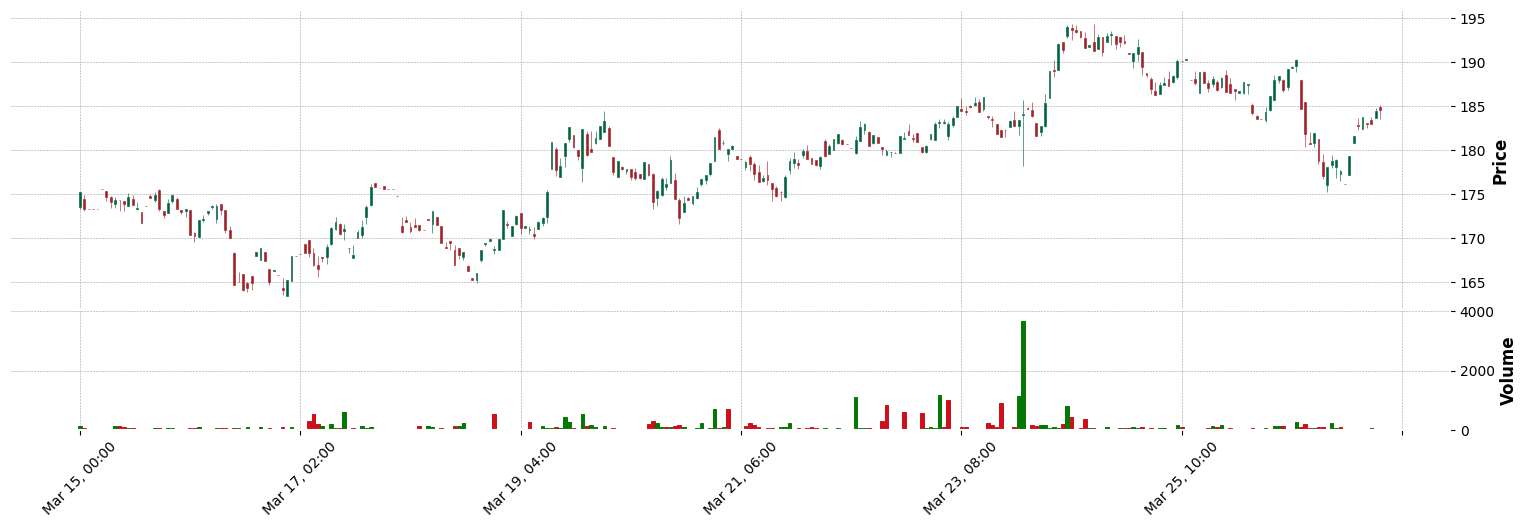

In [ ]:
import mplfinance as mpf

# Assuming candle_data is your DataFrame with the candle data
candle_data = candle_data.rename(columns={
    'time': 'Date',
    'price_open': 'Open',
    'price_close': 'Close',
    'price_high': 'High',
    'price_low': 'Low',
    'volume': 'Volume',
})

# Convert 'Date' column to datetime objects if it's not already
candle_data['Date'] = pd.to_datetime(candle_data['Date'])

# Set 'Date' as the index
candle_data = candle_data.set_index('Date')

# Plot the candles
mpf.plot(candle_data, type='candle', style='charles', volume=True, figsize=(20, 6))
